In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from utils import *
import seaborn as sns


Open datasets and merge

In [6]:
# unpack data
dfolder = 'data/dscovr/' # location of data
df = read_year(dfolder, '2016') # open first year

# loop to collect and merge all datasets across all years
yr = 2017
while yr < 2023:
    df_yr = read_year(dfolder, str(yr))
    df = pd.concat([df, df_yr], ignore_index=True)
    yr +=1

# check    
df['time'][0]
df.head()

,time,BX,BY,BZ,FC0,FC1,FC2,FC3,FC4,FC5,...,FC40,FC41,FC42,FC43,FC44,FC45,FC46,FC47,FC48,FC49
0,2016-01-01 00:00:00,6.83609,-3.37934,-12.9205,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-01 00:01:00,6.76732,-3.30194,-12.9967,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-01 00:02:00,6.39107,-2.61173,-13.3271,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-01 00:03:00,6.44897,-2.61525,-13.3299,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-01 00:04:00,6.58758,-2.73082,-13.2361,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1. Covnert FC values that are zero to NaN. 

From resources page: "The PlasMAG detectors do not take data all of the time, and the Faraday cup does not make measurements over its full range every minute. Whenever and wherever no data are available, the field is filled in with an integer 0. We recommend converting these to "NaN" in your computing environment after you load the data."

In [4]:
counts = df.count() # counts per col
thrsh = 1e6 # count threshold 

# check
print(f"mean: {np.mean(counts)}, max: {max(counts)}, min:{min(counts)}")

# convert faraday cup zeros to NaNs
df.iloc[:,-50:].replace(0, np.nan)

# drop variables with more than 50% NaN 
nan_count = df.isna().sum() # count of nan values  per col
df.dropna(axis=1, thresh=int(0.5*len(df)))

# drop cols from dataset with low counts (below threshold)
df = df.dropna(thresh=thrsh, axis=1)

,FC0,FC1,FC2,FC3,FC4,FC5,FC6,FC7,FC8,FC9,...,FC40,FC41,FC42,FC43,FC44,FC45,FC46,FC47,FC48,FC49
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3101755,44.4151,0.231726,0.231726,5.561450,16.87790,0.231726,0.231726,5.842020,45.9274,0.231726,...,363.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3101756,38.3516,0.231726,0.231726,17.396800,12.84820,0.231726,0.428618,11.170000,21.4848,0.231726,...,340.761,266.921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3101757,20.2907,0.231726,0.246122,0.885469,9.77093,0.231726,0.285326,0.471761,37.0559,0.231726,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3101758,54.5463,0.231726,0.678061,1.230790,26.98440,0.231726,3.211080,5.997920,44.9920,0.231726,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Remove data with low count, including NaNs

In [4]:
thrsh = 1e6 # count threshold 

# print counts below threshold
print(f"mean: {np.mean(counts)}, max: {max(counts)}, min:{min(counts)}")
#print(counts[counts < thrsh])

# drop cols from dataset with low counts
df = df.dropna(thresh=thrsh, axis=1)

mean: 1514407.5, max: 3101760, min:26256


/var/folders/8l/y30_j6_97qj5rc4x992936vr0000gp/T/ipykernel_23468/437661419.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfcorr = df.corr()


<Axes: >

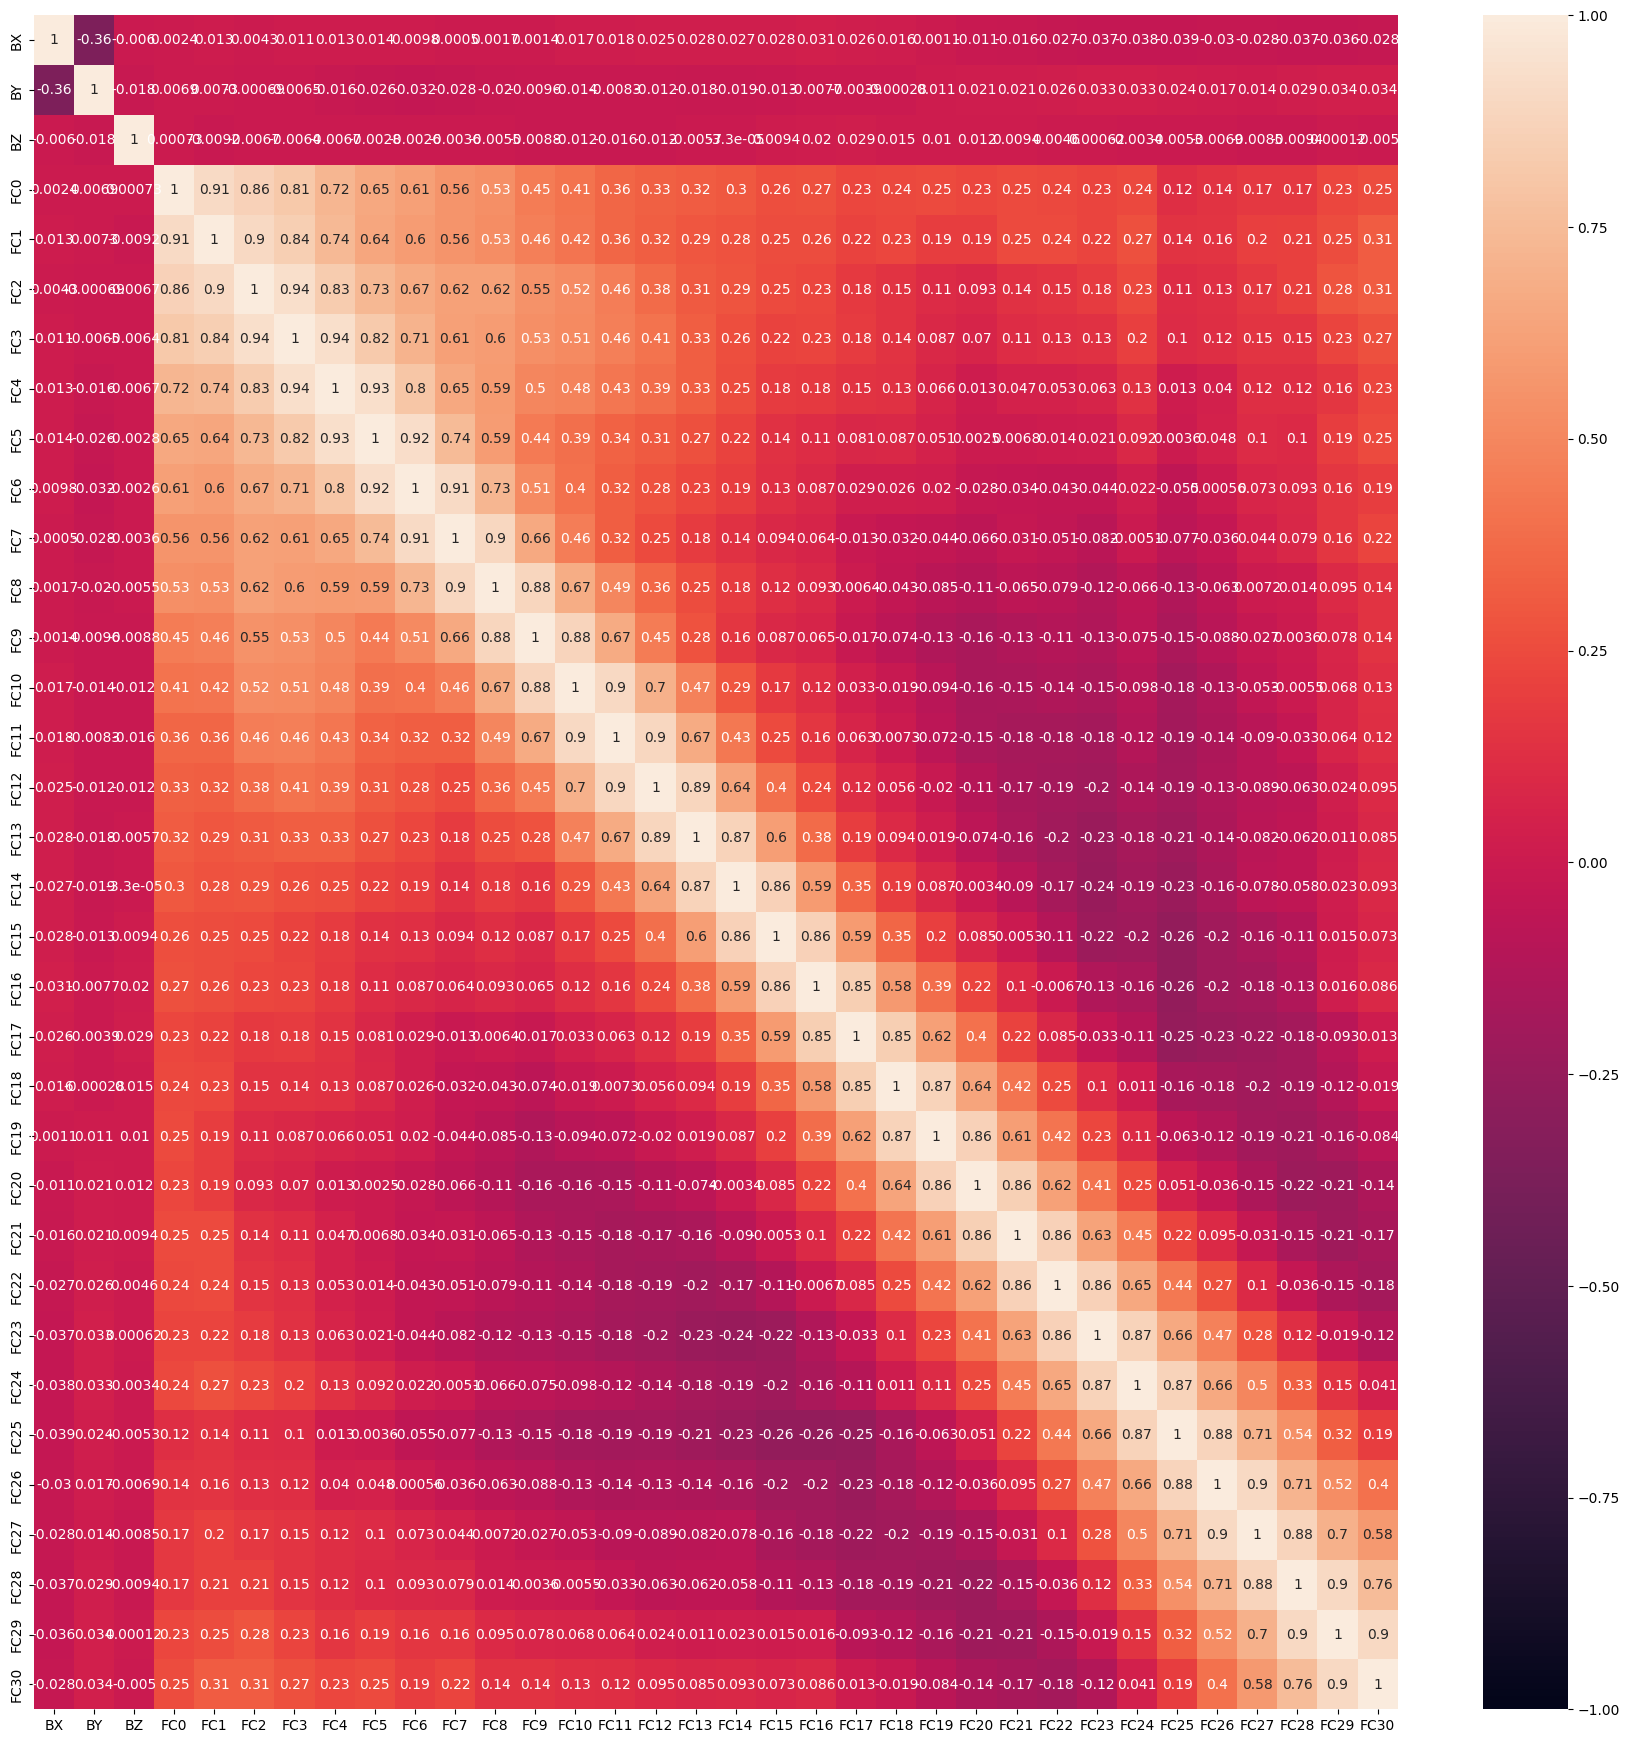

In [12]:
# heatmap
dfcorr = df.corr()
import seaborn as sns


fig, ax = plt.subplots(figsize=(22,22))     
sns.heatmap(dfcorr, annot=True, ax=ax, vmin=-1)

In [4]:
# dirty method for quick data overview
# print(df.describe())

# get correlation matrix
dfcorr_values = df.corr()

# stack matrix
stacked = dfcorr_values.stack()

# find highest correlation pairs
highest = stacked[stacked != 1.0].nlargest(10)
print(highest)

/var/folders/8l/y30_j6_97qj5rc4x992936vr0000gp/T/ipykernel_23128/1966292872.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfcorr_values = df.corr()


FC3  FC4    0.937408
FC4  FC3    0.937408
FC2  FC3    0.935079
FC3  FC2    0.935079
FC4  FC5    0.929852
FC5  FC4    0.929852
     FC6    0.924439
FC6  FC5    0.924439
FC0  FC1    0.912549
FC1  FC0    0.912549
dtype: float64


[Text(16436.0, 0, '2015-01-01'),
 Text(16801.0, 0, '2016-01-01'),
 Text(17167.0, 0, '2017-01-01'),
 Text(17532.0, 0, '2018-01-01'),
 Text(17897.0, 0, '2019-01-01'),
 Text(18262.0, 0, '2020-01-01'),
 Text(18628.0, 0, '2021-01-01'),
 Text(18993.0, 0, '2022-01-01'),
 Text(19358.0, 0, '2023-01-01')]

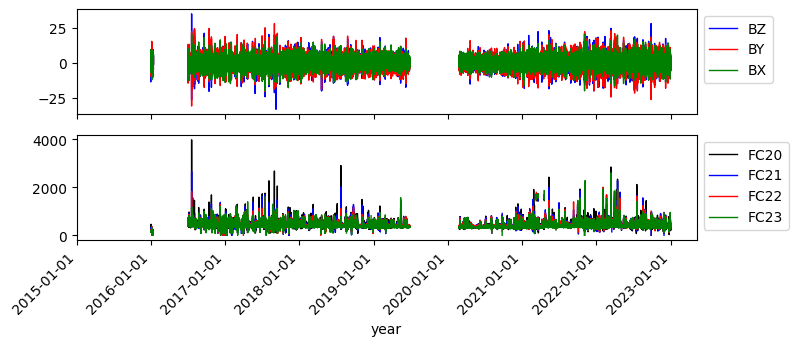

In [14]:
# quick function for plotting overview of data
def plot_var_overview(ax, t, var, ylab=False, **kwargs):
    
    var_name = var.name # get variable name

    ax.plot(t,var, linewidth=1, label=var_name, **kwargs)
    if ylab == True:
        ax.set_xlabel(f"year")
    
    # plot legend
    ax.legend(bbox_to_anchor=(1, 1))
    
# example, look at B(x,y,z)
fig, ax = plt.subplots(2, figsize=(8, 3), sharex=True) # (A/N): (8, 1) good size for single plot
plot_var_overview(ax[0],df['time'], df['BZ'], c='b')
plot_var_overview(ax[0],df['time'], df['BY'], c='r')
plot_var_overview(ax[0],df['time'], df['BX'], c='g')
plot_var_overview(ax[1],df['time'], df['FC20'], ylab = True, c='k')
plot_var_overview(ax[1],df['time'], df['FC21'], c='b')
plot_var_overview(ax[1],df['time'], df['FC22'], c='r')
plot_var_overview(ax[1],df['time'], df['FC23'], c='g')


# x-axis tick label rotation to fit length of dates
ax[1].set_xticks(ax[1].get_xticks().tolist())
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')
